### Visualizing Time Series Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('AAPL.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [4]:
# Shape of the dataset
df.shape

(10468, 7)

### Task 1
Plot the time series data in a line chart using the plot() function. Use the date feature as your indexed column when plotting the data. Show the results.

In [5]:
# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

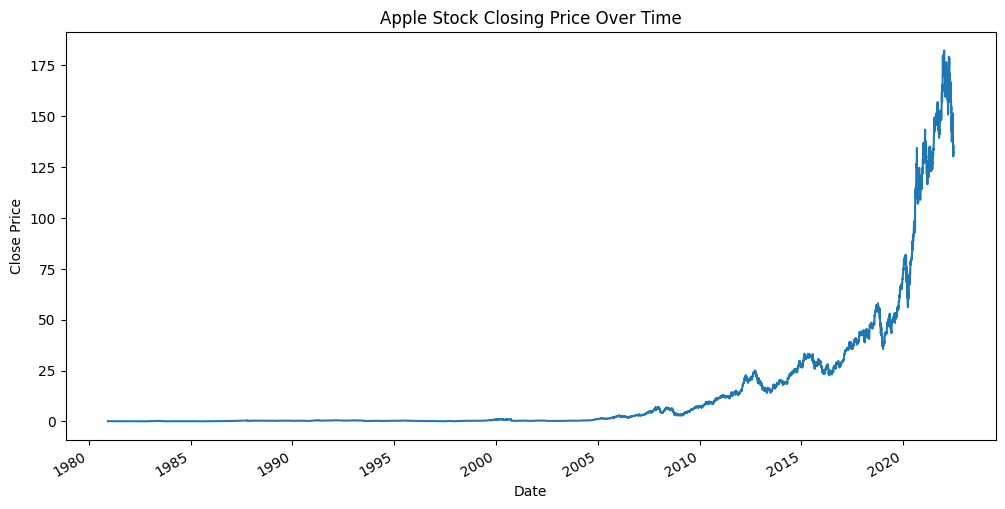

In [6]:
# Plot the 'Close' price
df['Close'].plot(title='Apple Stock Closing Price Over Time', figsize=(12, 6))
plt.ylabel('Close Price')
plt.show()

#### Plot Interpretation & Contextual Analysis

Plot Interpretation

This section describes the visual interpretation of Apple Inc.'s stock closing price time series chart.

- **X-axis (Date):**  
  Represents the timeline, ranging from the early 1980s to beyond 2020.

- **Y-axis (Close Price):**  
  Displays the closing price of Apple’s stock for each corresponding date on the timeline.

**General Trend Observations:**
- **1980s to Early 2000s:**  
  - The stock price remained **very low and relatively flat**, indicating minimal fluctuations and limited market activity or recognition.
  
- **2005 Onwards:**  
  - The stock price began to exhibit **exponential growth**, marking a clear upward trajectory in Apple's market performance.
  
- **Post-2010 Era:**  
  - A period of **rapid acceleration** in price, reflecting Apple’s emergence as a tech giant.
  
- **After 2020:**  
  - The stock chart shows **frequent spikes and drops**, highlighting a phase of **increased volatility**.

#### Contextual Understanding

A time-series chart doesn’t just reflect numbers—it tells the story of a company’s journey. Below is a historical breakdown of Apple’s market performance reflected in the chart:

**Early Years (1980s–1990s)**
- Apple was a **small tech firm**, just entering the personal computing space.
- Stock prices were **relatively stable but low**, due to limited investor engagement and modest product reach.

**2000s Boom**
- The launch of iconic products like the **iPod (2001)** and **iPhone (2007)** revolutionized consumer electronics.
- These innovations, along with **strong financial performance**, **increased investor confidence**, and **market expansion**, led to a **steady rise in stock prices**.

**Post-2010 Acceleration**
- With a **global footprint**, consistent **product innovation**, and strategic **stock splits**, Apple experienced **hyper-growth**.
- The stock price growth reflects its status as one of the **world’s most valuable companies**.

**Post-2020 Volatility**
- The chart displays **sharp fluctuations** during this period.
- Causes include:
  - **COVID-19 pandemic** impacts on global markets.
  - **Tech sector corrections**.
  - General **macroeconomic uncertainty** and **investor sentiment shifts**.

Apple’s stock price journey illustrates:
- Early **stability with low prices**.
- Mid-era **growth tied to innovation and strategic expansion**.
- Recent **volatility due to global events and market dynamics**.

This interpretation sets the stage for deeper **time series analysis**, including trend decomposition, forecasting (e.g., ARIMA models), and anomaly detection.

### Task 2
Zoom into a particular range of time: pick a range of 2 months from your dataset and plot it into a line chart. Show the results and explain the difference between this step and step 1.

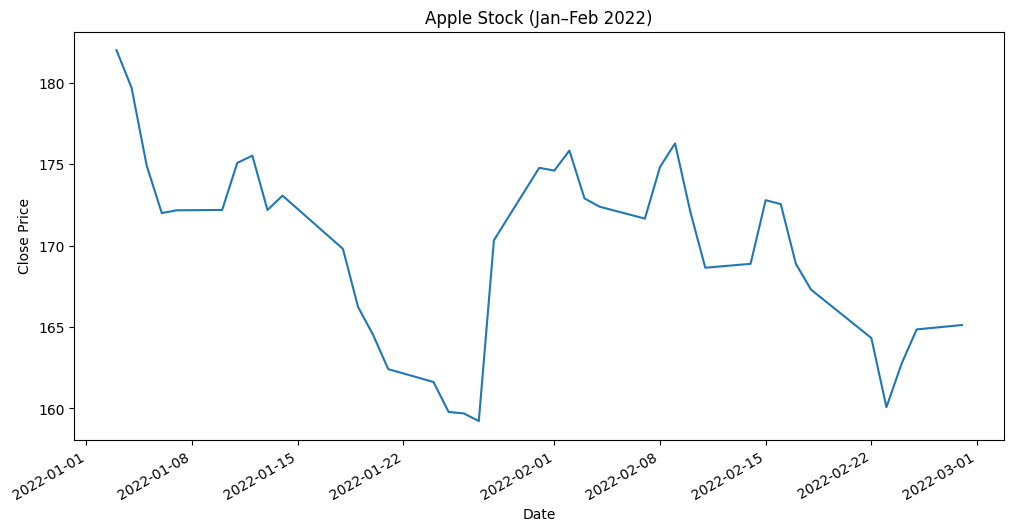

In [7]:
# Filter data to a 2-month window
zoomed_df = df['2022-01-01':'2022-02-28']

# Plot the zoomed-in Close prices
zoomed_df['Close'].plot(title='Apple Stock (Jan–Feb 2022)', figsize=(12, 6))
plt.ylabel('Close Price')
plt.show()

#### Zoomed Plot Interpretation

Zooming into this specific period allows us to better understand the **day-to-day fluctuations** and **short-term volatility** of Apple’s stock price.

- **More Detailed View of Daily Fluctuations:**  
  This time frame provides a **granular look** at how Apple's stock price changed on a daily basis, revealing patterns that are not visible in long-term plots.

**January 2022:**
- The price **starts above \$180** in early January.
- A **steady decline** follows, with the price **falling to around \$159 by the end of the month**.
- This decline may reflect broader market sell-offs, earnings speculation, or economic concerns.

**February 2022:**
- There is a **short-term recovery** in early February, signaling some investor optimism or market correction.
- However, the recovery is not sustained—**volatility continues throughout the month**.
- By the **end of February**, the stock experiences another **downward movement**, **bottoming around \$160**.
- A **slight rebound** occurs right before March, though not enough to recover early January levels.

#### Insight

This zoomed-in view is useful for:
- Understanding how Apple’s stock responds to **short-term news**, **market sentiment**, and **economic reports**.
- Highlighting **daily volatility** which may not be visible in broader trend plots.
- Serving as a foundation for **short-term forecasting models**, such as moving averages, ARIMA with shorter windows, or volatility modeling (e.g., GARCH).

The Jan–Feb 2022 snapshot reveals:
- A **notable short-term decline** from early January highs.
- **Recovery attempts** in February that were followed by renewed selling.
- **Increased price fluctuations**, making it a valuable case study for analyzing **market behavior during uncertainty**.

This localized analysis complements the broader time series perspective and supports **tactical decision-making**, such as **short-term trading strategies** or **risk management modeling**.


### Task 3
Add linear or polynomial trend lines to your time series dataset: plot a trend line using the regplot function from the seaborn library. Show the results and interpret the trend line.

In [9]:
# Reset index so Date is a column
df_reset = df.reset_index()

In [10]:
# Convert Date to ordinal (number format for regression)
df_reset['Date_ordinal'] = df_reset['Date'].map(pd.Timestamp.toordinal)

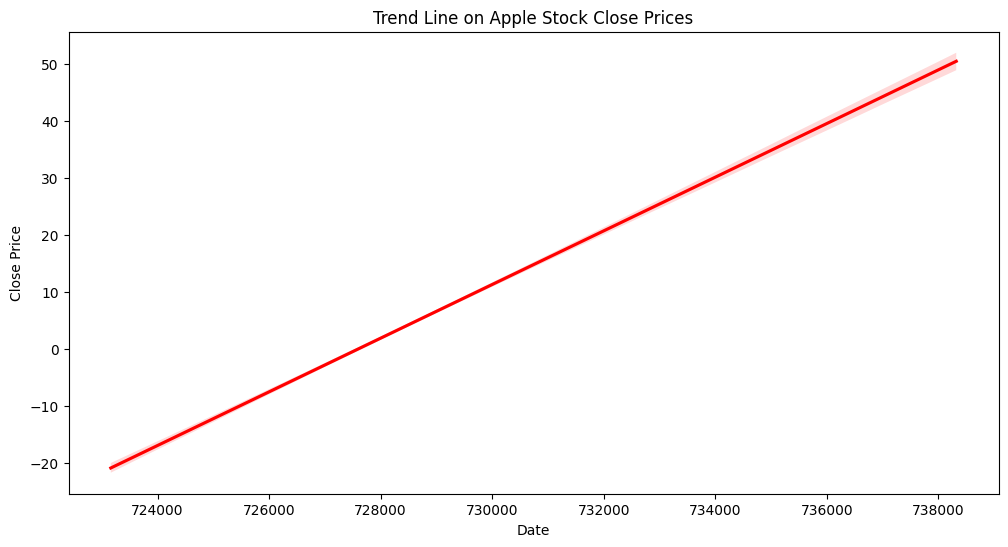

In [11]:
# Plot with trend line
plt.figure(figsize=(12, 6))
sns.regplot(x='Date_ordinal', y='Close', data=df_reset, scatter=False, color='red')
plt.title('Trend Line on Apple Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

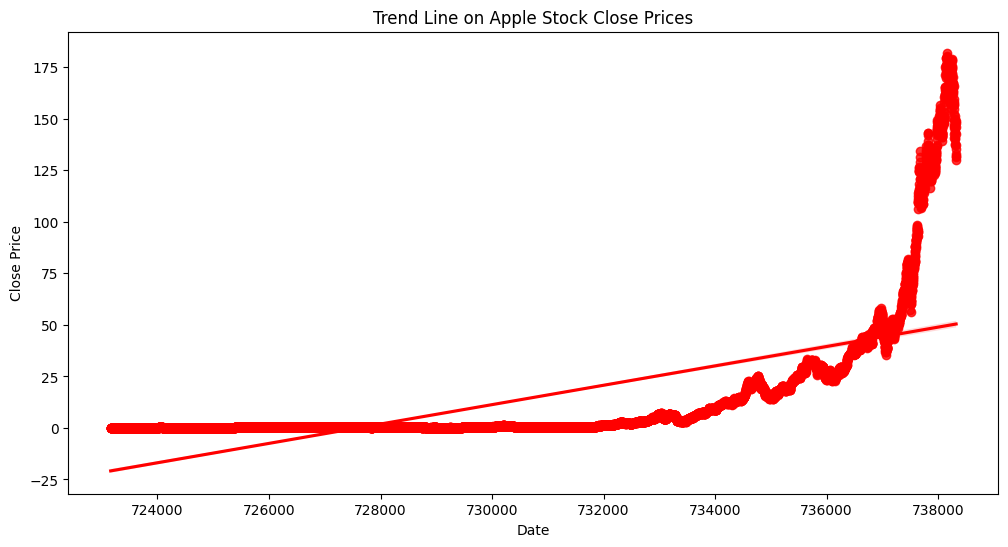

In [18]:
# Plot with trend line
plt.figure(figsize=(12, 6))
sns.regplot(x='Date_ordinal', y='Close', data=df_reset, scatter=True, color='red')
plt.title('Trend Line on Apple Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

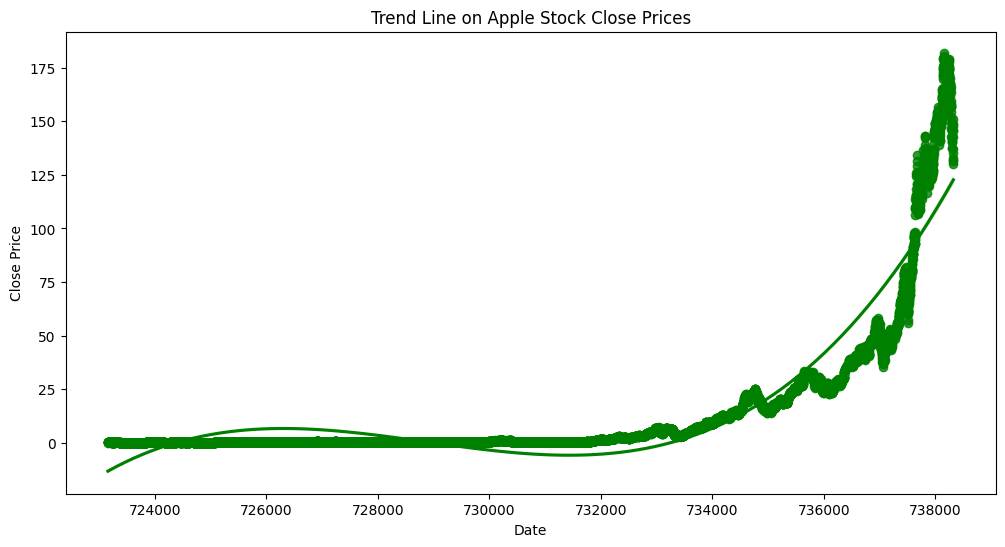

In [21]:
# Plot with trend line
plt.figure(figsize=(12, 6))
sns.regplot(x='Date_ordinal', y='Close', data=df_reset, order=3, scatter=True, color='green')
plt.title('Trend Line on Apple Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

#### Trend Line Interpretation
To better understand Apple Inc.'s stock performance over time, we examine two types of trend lines overlaid on the historical price chart: **linear** and **cubic (polynomial)**. Each provides a different perspective on the underlying trend in Apple's stock price movement.

**Linear Trend Line Interpretation**

The **linear trend line** is a straight line of best fit that summarizes the general direction of the stock price over the long term.
- The **positive slope** of the red linear trend line indicates a **long-term upward trend** in Apple’s stock price.
- Despite the **short-term fluctuations**, **market corrections**, and **periodic dips**, the line reflects consistent upward momentum over the decades.
- This trend is particularly useful for:
  - **High-level forecasting**
  - **Presenting the general direction to investors**
  - **Identifying whether the asset is generally appreciating or depreciating**

**Important Caveat:**
- While linear models are easy to interpret, they **oversimplify the true nature of growth**.
- Apple’s actual growth has been **non-linear and exponential**, especially in recent years.
- A linear fit does **not capture key changes** in growth rate, such as the flat period from the 1980s to early 2000s and the explosive surge post-2010.

**To improve the Accuracy**
A **polynomial regression** (e.g., cubic) or a **logarithmic transformation** may provide a more **realistic model** of Apple’s stock trajectory. Let me know if you'd like to explore those options next!

**Cubic (Polynomial) Trend Line Interpretation**

The **cubic trend line** introduces curvature into the trend, providing a more flexible and **accurate model** for assets with non-linear growth—like Apple.
- The curve starts **relatively flat**, accurately representing the **low and stagnant prices** during Apple’s early years.
- It then shows a **sharp upward bend**, capturing the **exponential growth** that occurred after major product launches and market expansions (iPhone, global penetration, etc.).
- The curve includes **gentle dips and curvature fluctuations** that align with **market corrections**, **recessions**, and other real-world events.

**Why Is Cubic Trend Line Better Than a Linear Fit?**
- **Realistic Modeling**: The polynomial model **adapts to the stock’s growth pattern**, capturing slow starts and rapid take-offs.
- **Captures Exponential Growth**: Apple’s growth wasn't constant—it **accelerated** significantly in the last 15 years. The curve reflects this change.
- **Accounts for Volatility**: Small deviations in the curve represent **volatility**, which a straight line completely ignores.

### Task 4
Suppress Seasonality: aggregate your data using the mean function at the yearly level to remove seasonality from your dataset. Plot the data and interpret the graph.

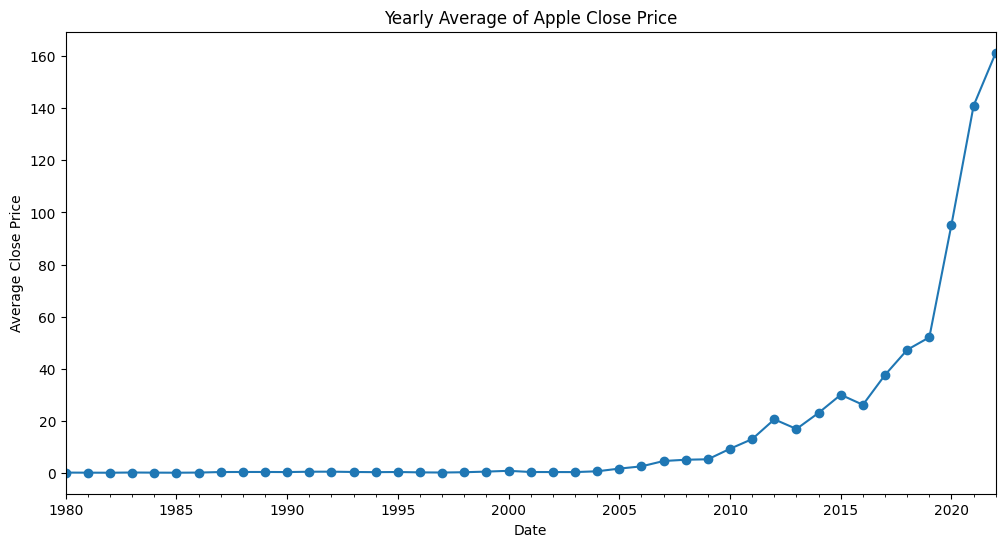

In [14]:
# Resample by year and take the mean
yearly_avg = df['Close'].resample('YE').mean()

# Plot
yearly_avg.plot(title='Yearly Average of Apple Close Price', figsize=(12, 6), marker='o')
plt.ylabel('Average Close Price')
plt.show()


#### Yearly Average Interpretation
The yearly average plot provides a **high-level overview** of Apple Inc.'s stock performance over the years, smoothing out daily fluctuations and seasonal effects.

**1980s–Early 2000s: Flat Growth Phase**
- The **closing price remained very low and relatively flat** for over two decades.
- This reflects Apple’s early stage as a **growing tech company**, prior to becoming a household name.
- The **personal computing revolution** was still in its infancy, and Apple hadn’t yet released its groundbreaking consumer devices.
- Key Points: limited lineup, lower consumer adoption, and modest investor interest.
  
**Early to Mid-2000s: Modest Uptick**

- Around **2004–2006**, a **visible upward inflection point** appears in the stock chart.
- This modest growth aligns with:
  - The **launch of the iPod**, which revolutionized digital music.
  - Introduction of innovative **Mac products** and early advancements in software.
  - **Increased media coverage and consumer adoption**, drawing **more investor attention**.
  - **Key Events:** iPod (2001), iTunes expansion, MacBook innovations, and Rising brand recognition.

**Post-2010: Rapid Acceleration**
- After **2010**, the stock enters a **steep upward climb**.
- The growth becomes **especially sharp after 2019**, indicating a phase of **hypergrowth**.
- **Key Drivers:**
    - **iPhone dominance** across global markets.
    - **Repeated product successes** (iPads, Apple Watch, services).
    - **Stock splits**, making shares more affordable to retail investors.
    - **Aggressive share buyback programs**, boosting earnings per share.
    - Strong **investor sentiment** and long-term confidence.

**2020–2021: Exponential Spike**
- One of the most dramatic price increases occurs in this period, shown as a **sharp upward spike**.
- This coincides with global economic shifts and unprecedented tech sector momentum.
- **Contributing Factors:**
    - **COVID-19 pandemic** increased reliance on tech and home devices.
    - **Market-wide boom** driven by stimulus and low interest rates.
    - Expansion of the **Apple product ecosystem** (e.g., M1 chip, services, subscriptions).
    - High **bullish sentiment** from retail and institutional investors.

Apple’s stock history illustrates a classic **innovation-driven growth curve**:
- **Slow beginnings**.
- **Gradual traction** during early innovation phases.
- **Explosive growth** once product-market fit and scale were achieved.

This progression makes Apple a compelling case study for:
- Time series modeling
- Innovation economics
- Market sentiment analysis
- Long-term investment strategy

### Task 5
Lag Scatter Plot: plot a scatter plot to test the correlation between lag values. Import the lag plot class from the pandas plotting library. Then, show and interpret the graph.

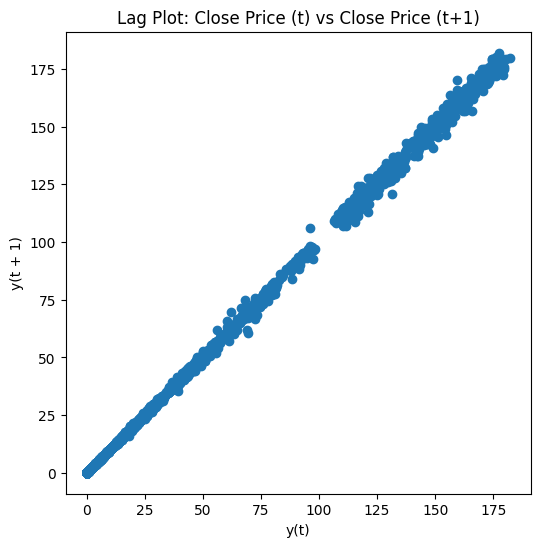

In [16]:
from pandas.plotting import lag_plot

# Lag plot with lag=1 (yesterday vs today)
plt.figure(figsize=(6, 6))
lag_plot(df['Close'], lag=1)
plt.title('Lag Plot: Close Price (t) vs Close Price (t+1)')
plt.show()

#### Lag Plot Interpretation: Closing Price at time `t` and `t+1`

To examine the temporal dependence in Apple’s stock prices, we utilize a lag plot that visualizes the relationship between the closing price at time step `t` and the closing price at time step `t+1`.

**Plot Description**
- **X-axis**: Closing price at time `t`.
- **Y-axis**: Closing price at time `t+1`.
- **Visual Pattern**: The data points form a concentrated diagonal cluster with a strong positive slope.

**Interpretation**
- The plot indicates a **high positive autocorrelation** at lag 1.
- This suggests that the closing price on any given day is strongly influenced by the price on the previous day.
- The pattern is typical of stock price data, where price movements are usually incremental rather than abrupt.
- The lag plot confirms the presence of **temporal structure**, implying that the series is **not random** (i.e., not white noise).

**Implications for Modeling**
- The observed autocorrelation supports the use of **autoregressive models**, such as AR(1), which leverage previous values to predict future ones.
- **ARIMA models** can further capture trends, seasonality, and noise in the time series.
- Advanced sequential models like **LSTM (Long Short-Term Memory networks)** can also utilize this structure for effective forecasting.

**Summary of Findings**
- There is a strong linear relationship between consecutive daily closing prices.
- The series displays high lag-1 autocorrelation, indicating persistence in the data.
- The stock price series is not purely random and contains predictive patterns.
- Time series forecasting models are appropriate for this data.
- This structure suggests strong potential for modeling and forecasting future stock movements using time-dependent algorithms.

### Task 6
Autocorrelation Plots: plot correlations with all possible lag values in your time-series dataset. Import the autocorrelation plot class from pandas plotting library. Show and interpret the graph. Explain how an autocorrelation function (ACF) and partial autocorrelation function (PACF) can be useful in forecasting.

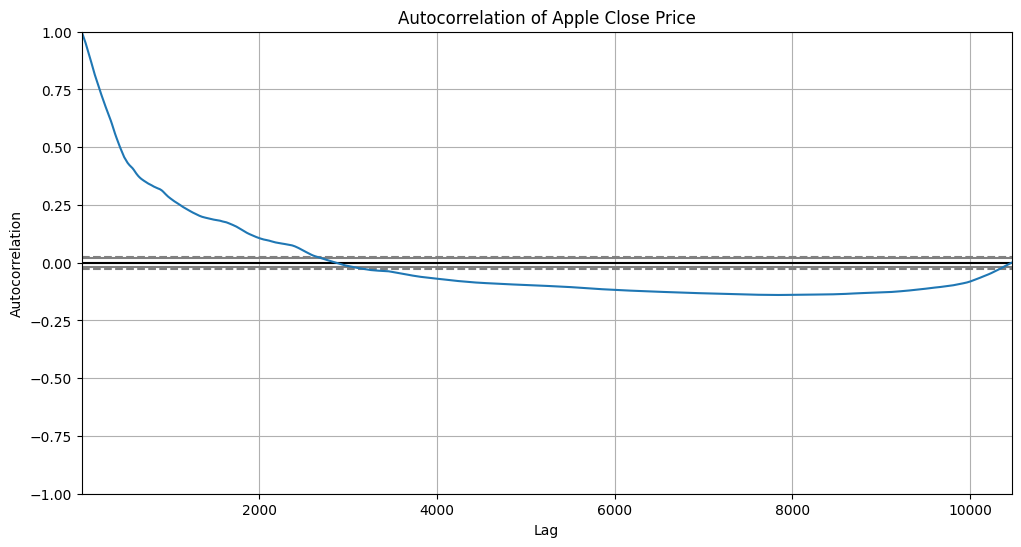

In [17]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation of Apple Close Price')
plt.show()


#### Autocorrelation Plot Interpretation for Apple Stock Prices

This task focuses on visualizing and interpreting the autocorrelation structure of Apple’s closing stock price over time. We use the Autocorrelation Function (ACF) to observe how the series correlates with its own lagged values.

**What the Autocorrelation Plot Shows?**

- **X-axis (Lag)**: Represents the number of time steps (e.g., days) the time series is shifted.
- **Y-axis (Autocorrelation)**: Measures the Pearson correlation between the original series and its lagged version.
- Each vertical line on the plot corresponds to the strength of correlation between the series and a particular lag.

**Key Observations from the ACF Plot**

1. **Lag = 0** shows an autocorrelation of 1.0, as the time series is always perfectly correlated with itself.
2. The **autocorrelation gradually decreases** as the lag increases, which is typical for stock price data.
3. Autocorrelation values remain **positive over a wide range of lags**, indicating strong persistence or memory in the series.
4. Eventually, the autocorrelation values **cross zero**, may become slightly negative, and then oscillate around zero.
5. This long memory behavior indicates the presence of **non-stationarity** in the time series.

**Interpretation of the ACF Plot**

- The pattern of slow decay in autocorrelations is a hallmark of a **non-stationary time series**.
- Stock prices are often non-stationary because they follow trends and are influenced by cumulative external factors.
- When modeling such a time series (e.g., with ARIMA), it is common to **difference** the data to achieve stationarity before fitting the model.

#### Forecasting with ACF and PACF

**Autocorrelation Function (ACF)**

- The ACF shows how each value in the time series correlates with its previous values at different lags.
- It helps identify the **Moving Average (MA)** component of an ARIMA model.
- If the ACF shows a sharp cut-off after a certain lag \( q \), it suggests an **MA(q)** process.

**Partial Autocorrelation Function (PACF)**

- The PACF measures the correlation between the series and its lag, **excluding the influence of shorter lags**.
- It is used to determine the **Autoregressive (AR)** component of an ARIMA model.
- If the PACF cuts off after lag \( p \), it suggests an **AR(p)** process.

**Overall Summary**
- Apple’s stock price series displays strong lagged correlations and long-term memory.
- The series is non-stationary, as indicated by the slow decay in ACF.
- Before applying ARIMA, **stationarity must be induced**, typically via differencing.
- **ACF** is useful for identifying the MA order, while **PACF** helps in determining the AR order in time series models.
- Together, ACF and PACF plots are essential tools for **selecting appropriate ARIMA model parameters**.

#### Link to the dataset
https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021/data
